In [1]:
 from google.colab import drive 
 drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/time_series_analysis/

/content/drive/MyDrive/time_series_analysis


In [6]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import pandas as pd

In [7]:
data=pd.read_csv('./airline_passenger_traffic.csv')

In [8]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [10]:
data['Month']=pd.to_datetime(data['Month'],infer_datetime_format=True)

In [11]:
data=data.set_index(['Month'])


In [12]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Exploring the data

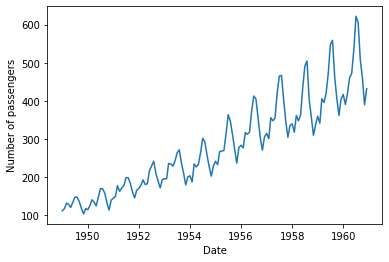

In [13]:
plt.xlabel('Date')
plt.ylabel('Number of passengers')
plt.plot(data)

In [14]:
data.isna().sum()

#Passengers    0
dtype: int64

In [15]:
#detereming rolling statistics

rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01    13.720147
1950-01-01    13.453342
1950-02-01    13.166475
1950-03-01    13.686977


checking stationarity with rolling mean and standard deviation

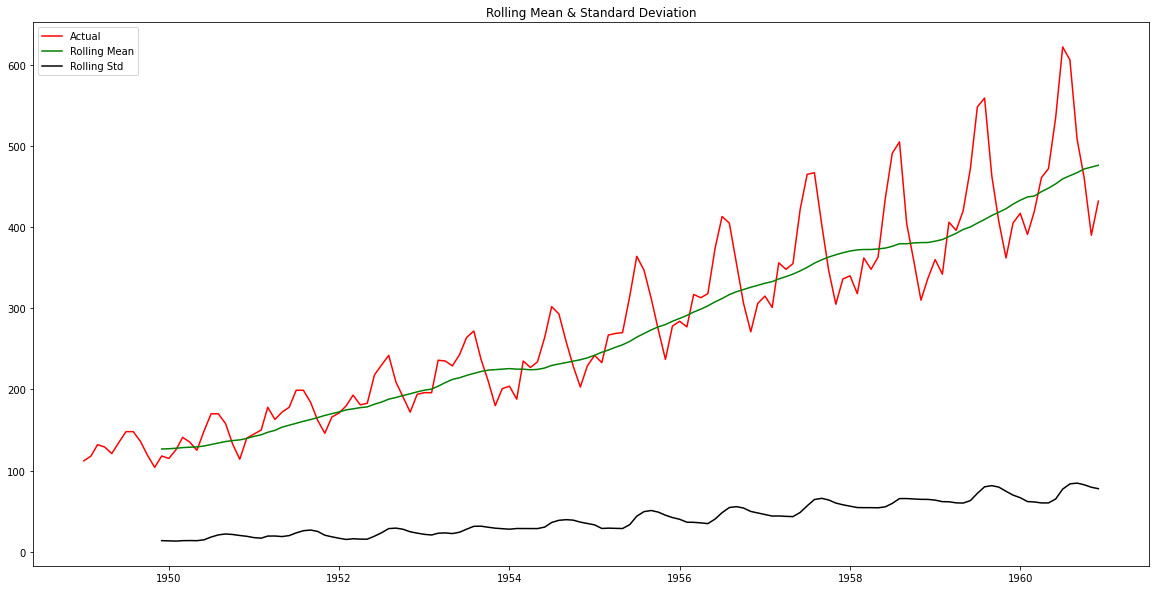

In [16]:
#plotting rolling mean and standard deviation
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [17]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['#Passengers'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Dickey-Fuller Test: 
Test Statistic            0.815369
p-value                   0.991880
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


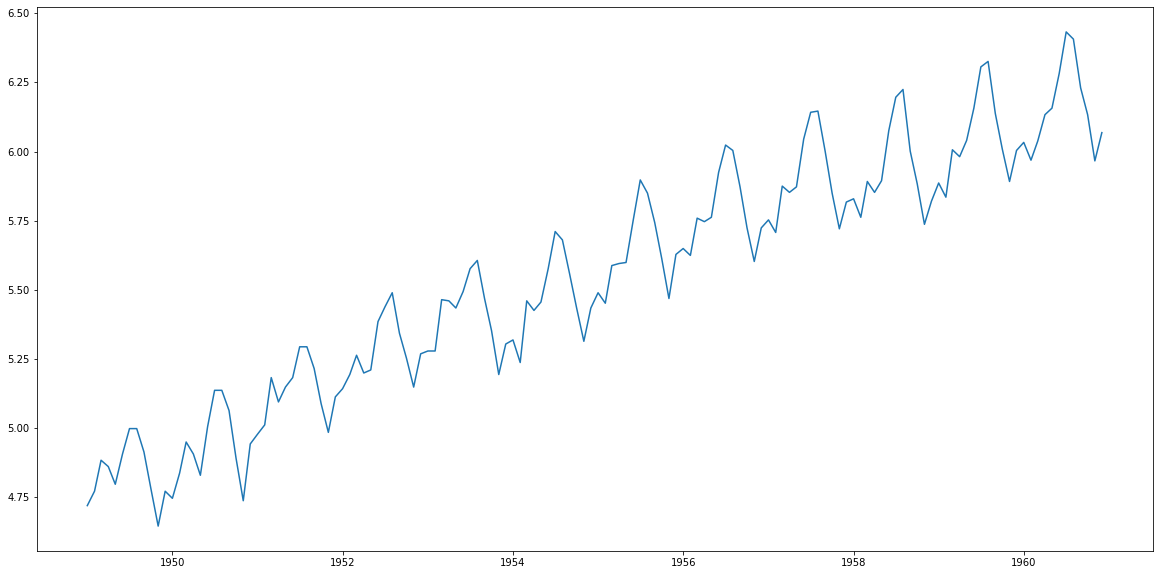

In [18]:
#Performing log transformation to make our Time series stationary and plotting
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

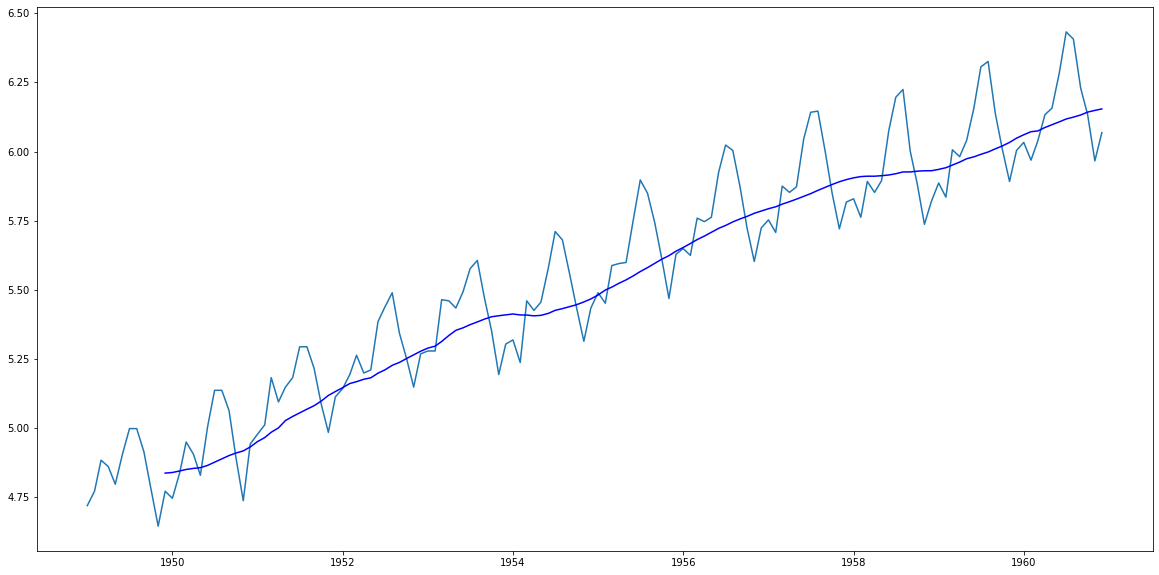

In [19]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

In [20]:
#Using differencing method, to make our time series stationary
data_log_diff=data_log-MAvg
data_log_diff.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [21]:
#dropping nan values
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [22]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

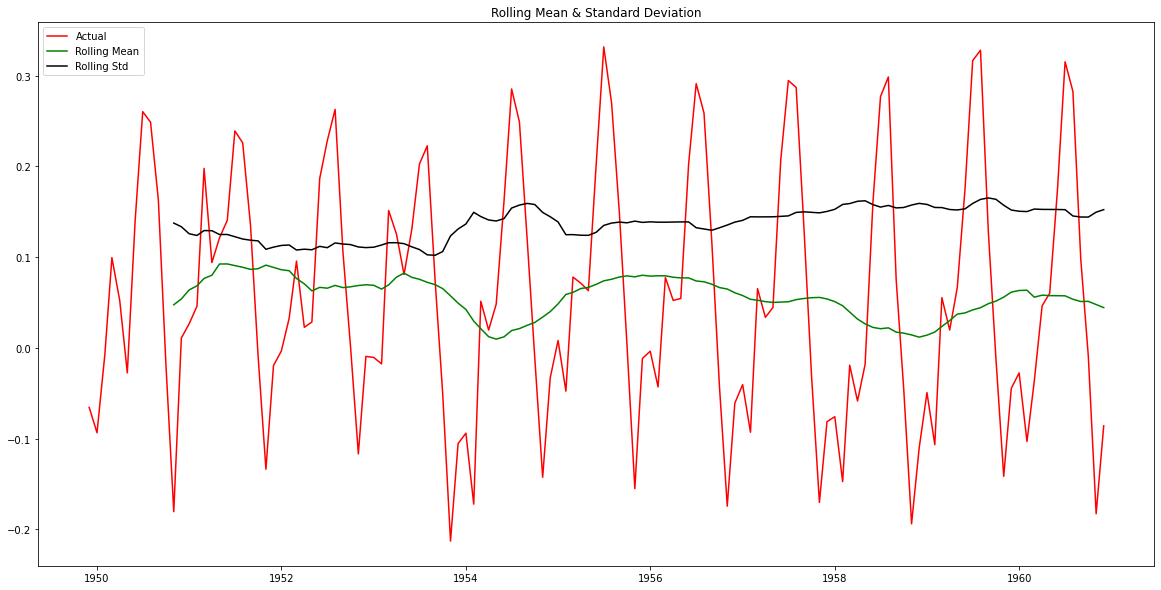

Dickey-Fuller Test: 
Test Statistic           -3.162908
p-value                   0.022235
Lags Used                13.000000
No. of Obs              119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [23]:
#Checking the stationarity of differenced data
stationarity(data_log_diff)

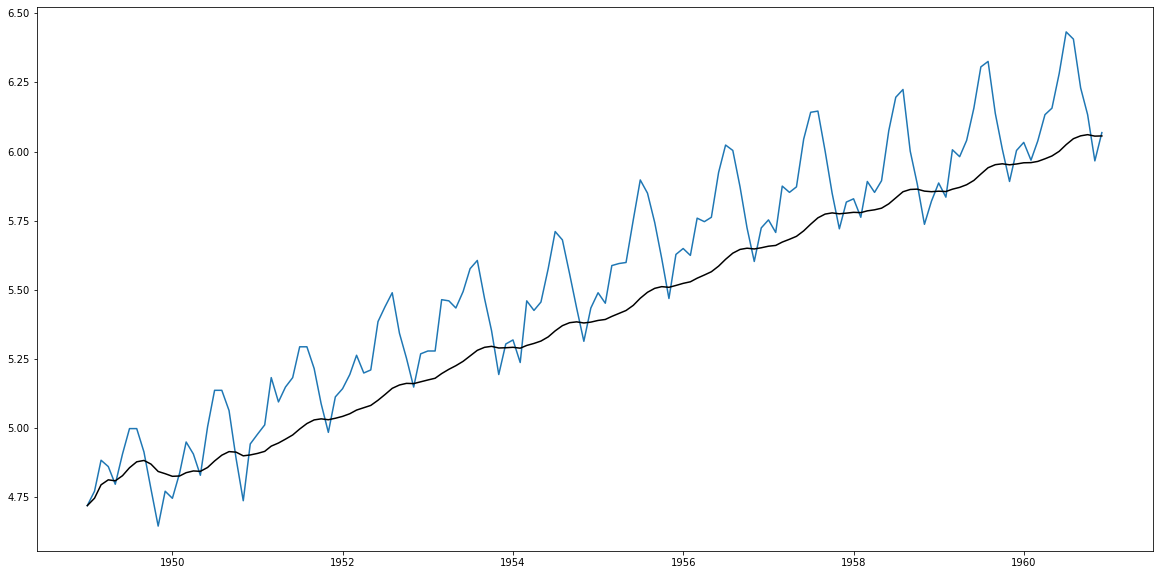

In [24]:
#performing exponential transformation on our data
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')

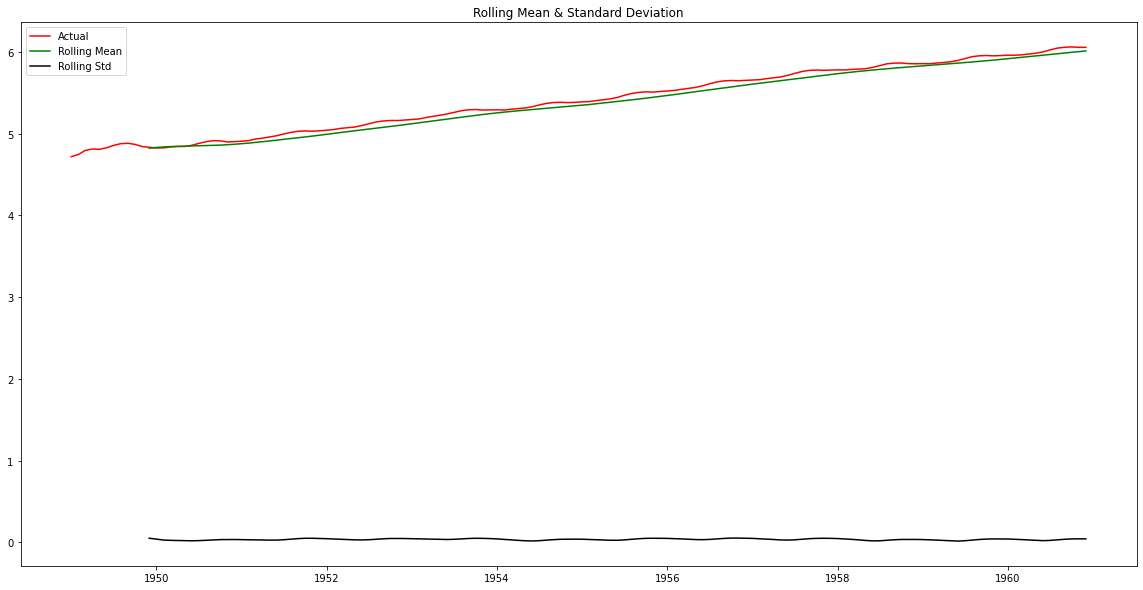

Dickey-Fuller Test: 
Test Statistic           -2.148248
p-value                   0.225561
Lags Used                14.000000
No. of Obs              129.000000
Critical Value (1%)      -3.482088
Critical Value (5%)      -2.884219
Critical Value (10%)     -2.578864
dtype: float64


In [25]:
#checking stationarity
stationarity(exp_data)

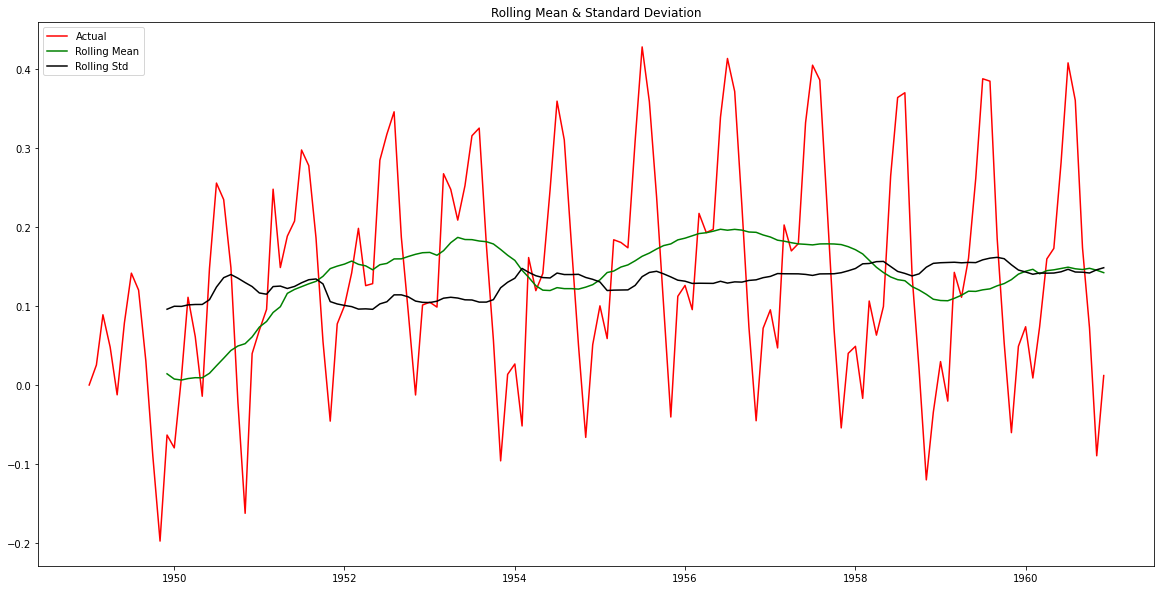

Dickey-Fuller Test: 
Test Statistic           -3.601262
p-value                   0.005737
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [26]:
# Since exponential transformation is non-stationary, applying differencing on our data
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

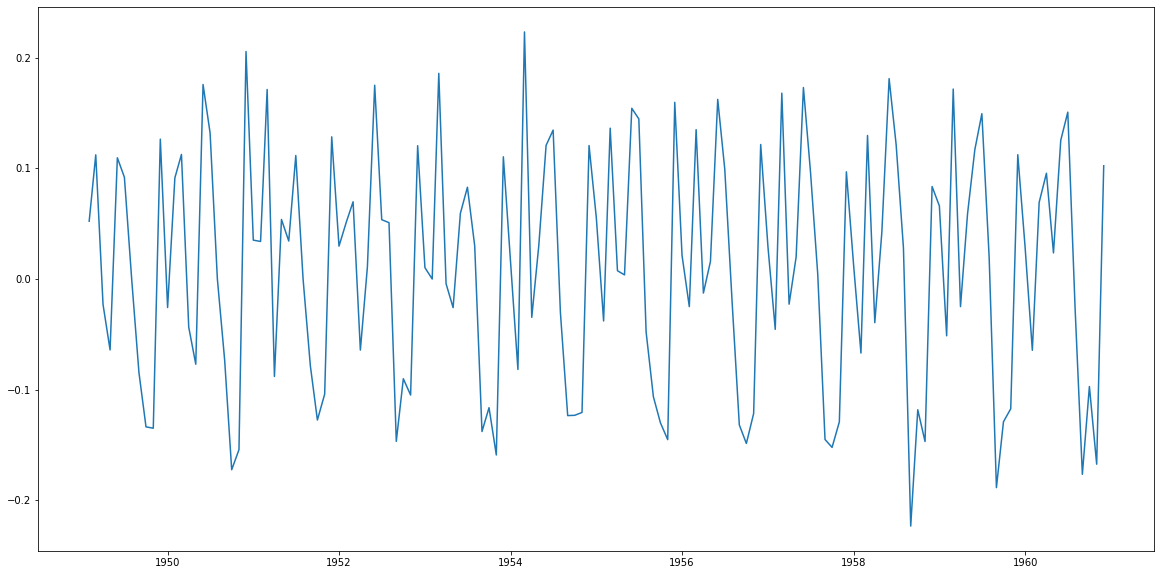

In [27]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

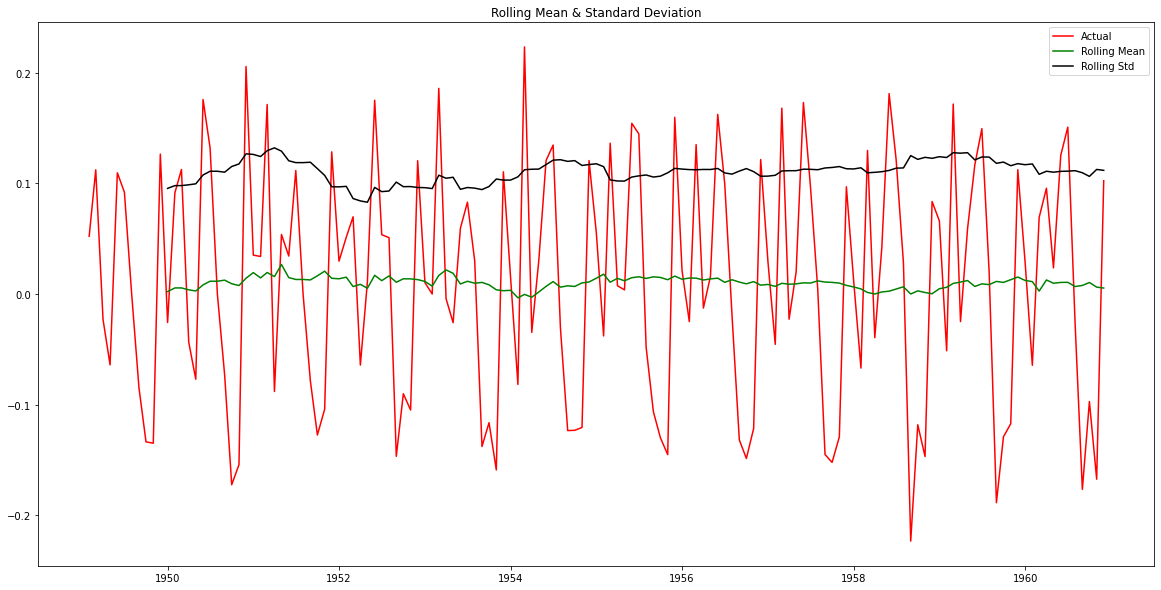

Dickey-Fuller Test: 
Test Statistic           -2.717131
p-value                   0.071121
Lags Used                14.000000
No. of Obs              128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


In [28]:
data_shift=data_shift.dropna()
stationarity(data_shift)

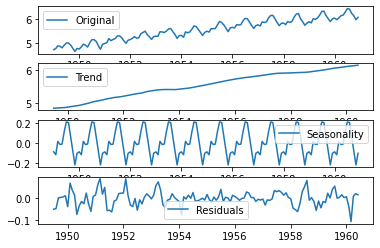

In [29]:
#Decomposing Time Series into its components : Trend, Seasonality and Residual

from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.show()

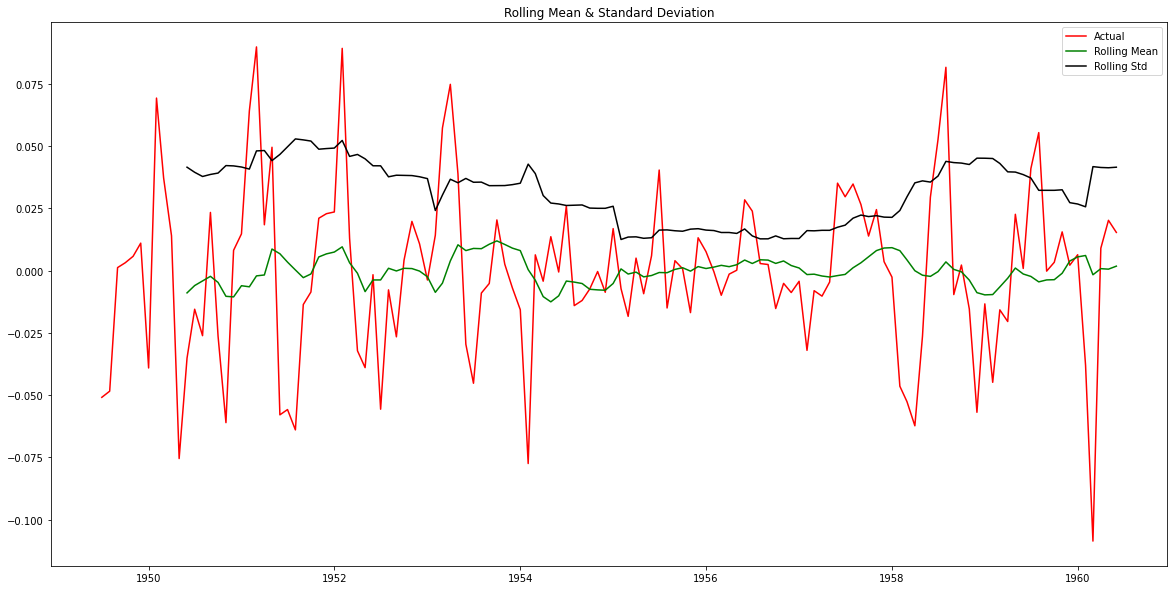

Dickey-Fuller Test: 
Test Statistic         -6.332387e+00
p-value                 2.885059e-08
Lags Used               9.000000e+00
No. of Obs              1.220000e+02
Critical Value (1%)    -3.485122e+00
Critical Value (5%)    -2.885538e+00
Critical Value (10%)   -2.579569e+00
dtype: float64


In [30]:
#Checking the stationarity of Time Series components
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

In [31]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [32]:
arma_order_select_ic(data_shift)

{'bic':             0           1           2
 0 -225.639206 -228.618781 -228.527575
 1 -226.497365 -229.756336 -250.375467
 2 -225.753257 -255.336992 -269.503740
 3 -222.137562 -252.308124 -249.418687
 4 -232.957928 -253.670744 -253.229736, 'bic_min_order': (2, 2)}

Building AR model

In [33]:
from statsmodels.tsa.arima_model import ARIMA

Plotting AR model


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


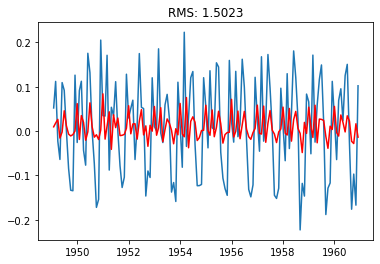

In [34]:
print('Plotting AR model')
model=ARIMA(data_log,order=(2,1,0))
result_AR=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(result_AR.fittedvalues,color='red')
plt.title('RMS: %.4f'%sum((result_AR.fittedvalues-data_shift['#Passengers'])**2))
plt.show()

In [35]:
result_AR

In [36]:
data_log.tail()

,#Passengers
Month,
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398
1960-11-01,5.966147
1960-12-01,6.068426


In [37]:
predictions=pd.Series(result_AR.fittedvalues, copy=True)
print(predictions.tail())

Month
1960-08-01    0.022921
1960-09-01   -0.023143
1960-10-01   -0.028120
1960-11-01    0.016517
1960-12-01   -0.013713
dtype: float64


In [38]:
#Performing Inverse Transformation for differencing, by doing cumulative sum

predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

Month
1949-02-01    0.009600
1949-03-01    0.027767
1949-04-01    0.054202
1949-05-01    0.038433
1949-06-01    0.036289
dtype: float64


In [44]:
#Below is data display of predicted value in log scale
predictions_log=pd.Series(data_log['#Passengers'].iloc[0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728099
1949-03-01    4.746265
1949-04-01    4.772700
1949-05-01    4.756932
dtype: float64

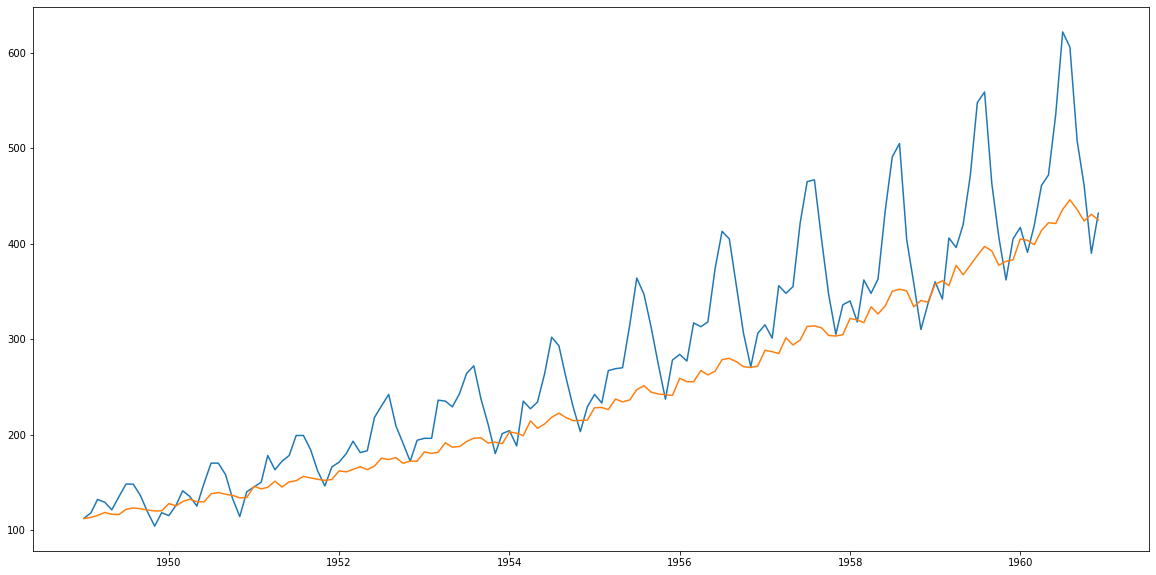

In [45]:
# Taking out log transformation and visualizing actual vs predicted value graph
predictions_AR=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_AR)

In [46]:
x=result_AR.forecast(steps=120)
x[0]

array([6.13038725, 6.13635263, 6.13606414, 6.14395848, 6.15486148,
       6.16506279, 6.17457969, 6.18405618, 6.19364118, 6.20325875,
       6.21286528, 6.22246359, 6.23206187, 6.24166156, 6.25126158,
       6.26086144, 6.27046121, 6.28006098, 6.28966077, 6.29926056,
       6.30886035, 6.31846013, 6.32805992, 6.33765971, 6.3472595 ,
       6.35685929, 6.36645907, 6.37605886, 6.38565865, 6.39525844,
       6.40485823, 6.41445801, 6.4240578 , 6.43365759, 6.44325738,
       6.45285717, 6.46245696, 6.47205674, 6.48165653, 6.49125632,
       6.50085611, 6.5104559 , 6.52005568, 6.52965547, 6.53925526,
       6.54885505, 6.55845484, 6.56805463, 6.57765441, 6.5872542 ,
       6.59685399, 6.60645378, 6.61605357, 6.62565335, 6.63525314,
       6.64485293, 6.65445272, 6.66405251, 6.67365229, 6.68325208,
       6.69285187, 6.70245166, 6.71205145, 6.72165124, 6.73125102,
       6.74085081, 6.7504506 , 6.76005039, 6.76965018, 6.77924996,
       6.78884975, 6.79844954, 6.80804933, 6.81764912, 6.82724

Building MA model

Plotting MA model


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


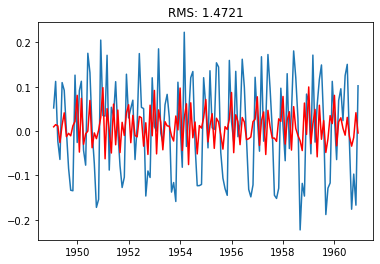

In [47]:
print('Plotting MA model')
model=ARIMA(data_log,order=(0,1,2))
result_MA=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(result_MA.fittedvalues,color='red')
plt.title('RMS: %.4f'%sum((result_MA.fittedvalues-data_shift['#Passengers'])**2))
plt.show()

In [48]:
x=result_MA.forecast(steps=120)
x[0]

array([6.1707362 , 6.14402915, 6.15365999, 6.16329084, 6.17292169,
       6.18255254, 6.19218339, 6.20181424, 6.21144509, 6.22107594,
       6.23070679, 6.24033764, 6.24996849, 6.25959934, 6.26923018,
       6.27886103, 6.28849188, 6.29812273, 6.30775358, 6.31738443,
       6.32701528, 6.33664613, 6.34627698, 6.35590783, 6.36553868,
       6.37516953, 6.38480037, 6.39443122, 6.40406207, 6.41369292,
       6.42332377, 6.43295462, 6.44258547, 6.45221632, 6.46184717,
       6.47147802, 6.48110887, 6.49073972, 6.50037056, 6.51000141,
       6.51963226, 6.52926311, 6.53889396, 6.54852481, 6.55815566,
       6.56778651, 6.57741736, 6.58704821, 6.59667906, 6.60630991,
       6.61594075, 6.6255716 , 6.63520245, 6.6448333 , 6.65446415,
       6.664095  , 6.67372585, 6.6833567 , 6.69298755, 6.7026184 ,
       6.71224925, 6.7218801 , 6.73151094, 6.74114179, 6.75077264,
       6.76040349, 6.77003434, 6.77966519, 6.78929604, 6.79892689,
       6.80855774, 6.81818859, 6.82781944, 6.83745029, 6.84708

ARIMA MODEL

Plotting AR model


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


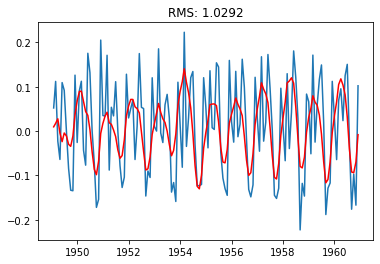

In [49]:
print('Plotting AR model')
model=ARIMA(data_log,order=(2,1,2))
result_ARIMA=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(result_ARIMA.fittedvalues,color='red')
plt.title('RMS: %.4f'%sum((result_ARIMA.fittedvalues-data_shift['#Passengers'])**2))
plt.show()

In [50]:
predictions=pd.Series(result_ARIMA.fittedvalues, copy=True)
print(predictions.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


In [51]:
#Performing Inverse Transformation for differencing, by doing cumulative sum

predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [53]:
#Below is data display of predicted value in log scale
predictions_log=pd.Series(data_log['#Passengers'].iloc[0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

In [ ]:
# Taking out log transformation and visualizing actual vs predicted value graph
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)